In [4]:
from numpy import *
from scipy import signal
from scipy.integrate import quad
import TMQGP as tm
import tqdm.notebook as tqdm
from QuarkTM import Particle, Channel
import QuarkTM
import pickle
import matplotlib

In [5]:
matplotlib.style.use('publication')

In [6]:
((47.5/16)**(1/3) ) * 0.155

0.22276976180911218

In [7]:
sqrt(940**2 + 300**2)

986.7117106835208

In [8]:
(47.5/16)**0.25 

1.3126332671432939

In [9]:
from syntax_sugar import pipe, END
from syntax_sugar import thread_syntax as t, process_syntax as p

NTHR = 14

# Import data

In [57]:
mode = 'LO'

In [58]:
folder = 'output/TestL1'+mode+'_G=6.00L=0.500MG=1.60screen=0.060/'

In [59]:
folder = 'output/TestL1LO_G=15.00L=0.250MG=1.60screen=0.055/'

In [60]:
folder = r'output/TestL1LO_G=(12.00,14.00)L=0.250MQ=0.60MG=1.40screen=0.040/'

In [61]:
folder = r'output/TestL1LO_G=(15.00,16.00)L=0.200MQ=0.40MG=1.40screen=0.030/'

In [62]:
folder = 'output/TestL1LO_G=(12.00,12.00)L=0.250MQ=0.60MG=1.40screen=0.030/'

In [63]:
folder = 'output/TestTrangeL1LO_G=(12.00,12.00)L=0.250MQ=0.60MG=1.40screen=0.030/'

In [64]:
folder = 'output/TestL1LO_G=(32.00,32.00)L=0.100MQ=0.60MG=1.40screen=0.010/'

In [65]:
folder = 'output/SuppressGL1LO_G=(12.00,13.00)L=0.200MQ=0.60MG=1.80screen=0.000/'

In [66]:
folder = 'output/SuppressGL1HI_G=(13.00,14.00)L=0.200MQ=0.60MG=1.80screen=0.010/'

In [67]:
folder = 'output/TestDef_XHI_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.030/'

In [138]:
folder = '/home/const/Numerics/TMQGP/ipy/TMQGP/test/InspectIterations/SuppressFixG_LO_G=(14.50,15.50)L=0.200MQ=0.60MG=1.80screen=0.010/'

In [139]:
trange = array([0.16, 0.2, 0.3, 0.4, 0.5])
# trange = array([0.16, 0.2])

In [140]:
lmax = 1

In [170]:
pQs = []
pGs = []

ch_names_Q = ['qa1', 'qa8', 'qq3', 'qq6', 'qg3', 'qg6', 'qg15']
ch_names_G = ['gg1', 'gq3', 'gq6', 'gq15', 'gg16', 'gg27']

TMs_Q = []
TMs_G = []
Xs_Q = []
Xs_G = []
# Sigmas = []
SQs = []
SGs = []


for T in trange:
    qrange = np.loadtxt(folder + 'qrange_T=%.3f.dat'%T)
    erange = np.loadtxt(folder + 'erange_T=%.3f.dat'%T)
    Gtab_Q = np.loadtxt(folder + 'Q_G_T=%.3f.dat'%T, dtype=complex)
    
    Gtab_Q = 1/(1/Gtab_Q - 0*5e-2j)
    
    pQ = QuarkTM.Particle(0.6, qrange, erange, 
                         Gtab=Gtab_Q)
    pQs += [pQ]

    Gtab_G = np.loadtxt(folder + 'G_G_T=%.3f.dat'%T, dtype=complex)
    
    Gtab_G = 1/(1/Gtab_G - 0*5e-2j)
    
    pG = QuarkTM.Particle(1.8, qrange, erange, 
                         Gtab=Gtab_G, stat='b', d=16)
    pGs += [pG]
    
    
    SQ = np.loadtxt(folder + 'Q_S_T=%.3f.dat'%T, dtype=complex)
    
    SQs += [SQ]

    SG = np.loadtxt(folder + 'G_S_T=%.3f.dat'%T, dtype=complex)
    
    SGs += [SG]

    tmss_Q = []
    smss_Q = []
    xmss_Q = []

    for l in range(lmax + 1):
        tms_Q = dict()
        sms_Q = dict()
        xms_Q = dict()
        for ch in ch_names_Q:
    #         print(ch)
            _tm = np.loadtxt(folder + f'Q_TM_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            
            _x = np.loadtxt(folder + f'Q_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            tms_Q[ch] = _tm
            
    #         sigma = np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T)
            # sigma = (1j*np.loadtxt(folder + f'Q_ImS_{ch}_T=%.3f.dat'%T)
            #         + np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T))
            
            # sms[ch] = sigma
            xms_Q[ch] = _x
        tmss_Q += [tms_Q]
        xmss_Q += [xms_Q]

    tmss_G = []
    smss_G = []
    xmss_G = []

    

    for l in range(lmax + 1):
        tms_G = dict()
        sms_G = dict()
        xms_G = dict()
        for ch in ch_names_G:
    #         print(ch)
            
            _tm = np.loadtxt(folder + f'G_TM_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)

            # print(folder + f'G_X_{ch}_l=%i_T=%.3f.dat'%(l,T))
            _x = np.loadtxt(folder + f'G_X_{ch}_l=%i_T=%.3f.dat'%(l,T),
                           dtype=complex)
            tms_G[ch] = _tm
            
    #         sigma = np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T)
            # sigma = (1j*np.loadtxt(folder + f'Q_ImS_{ch}_T=%.3f.dat'%T)
            #         + np.loadtxt(folder + f'Q_ReS_{ch}_T=%.3f.dat'%T))
            
            # sms[ch] = sigma
            xms_G[ch] = _x.copy()
            # if ch == 'gg1':
            #     plt.plot(erange, _x[:, 0])

        tmss_G += [tms_G]
        xmss_G += [xms_G]

        # print(tmss_G[0]['gg1'][:, 0])
        # plt.plot(erange, xmss_G[-1]['gg1'][:, 0], ls='--')

    

    # plt.plot(erange, xmss_G[0]['gg1'][:, 0], ls=':')
    # plt.plot(erange, xmss_G[1]['gg1'][:, 0], ls=':')
    
    # break
        
    Xs_Q += [xmss_Q]
    TMs_Q += [tmss_Q]
    Xs_G += [xmss_G]
    TMs_G += [tmss_G]
    # Sigmas += [sms]

## Plots of everything

In [171]:
irange = [0, 1]

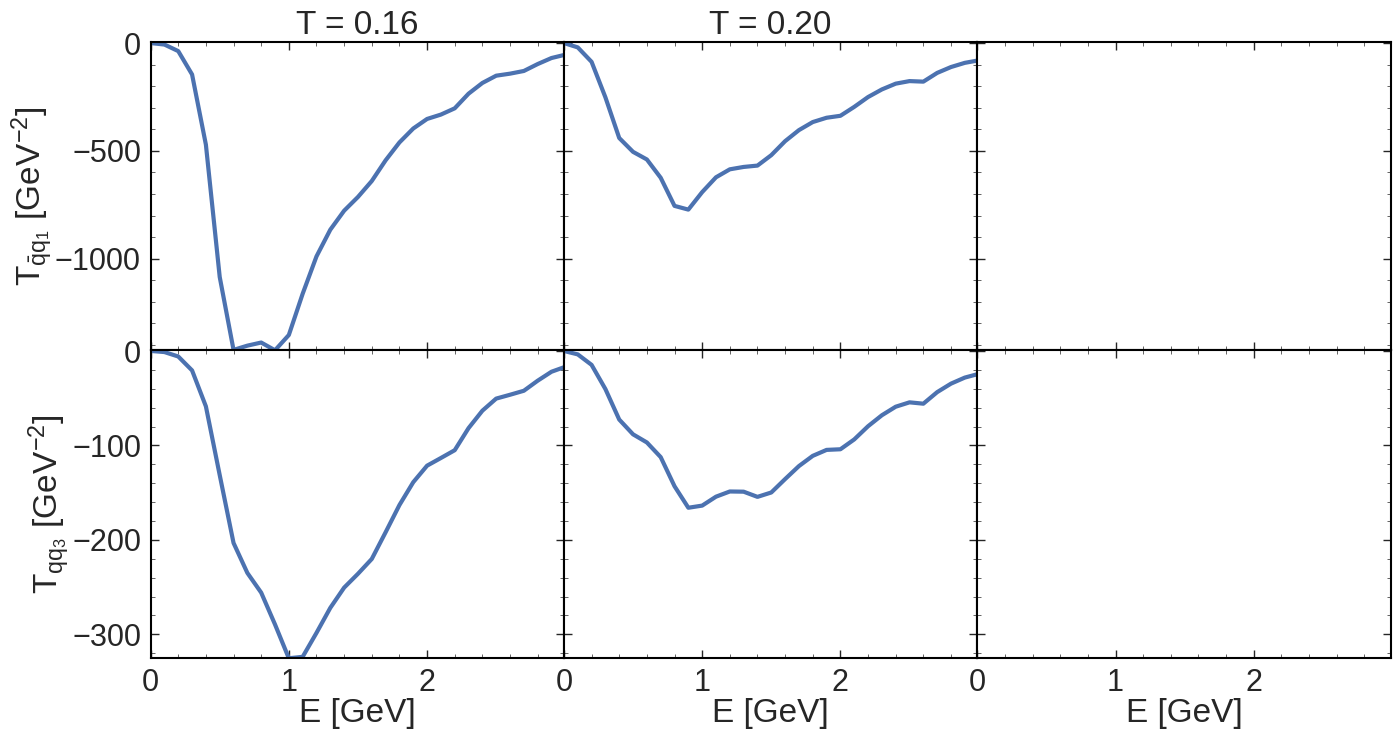

In [172]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(TMs_Q[i][0]['qa1'][:, 0]))
    ax[1][_i].plot(erange, imag(TMs_Q[i][0]['qq3'][:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(0, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

ax[0][0].set_ylabel(r'$T_{\bar q q_1}$ [GeV$^{-2}$]')
ax[1][0].set_ylabel(r'$T_{q q_3}$ [GeV$^{-2}$]')

plt.subplots_adjust(hspace=0, wspace=0)

plt.savefig(folder + 'T_Q_l0.pdf', bbox_inches='tight')

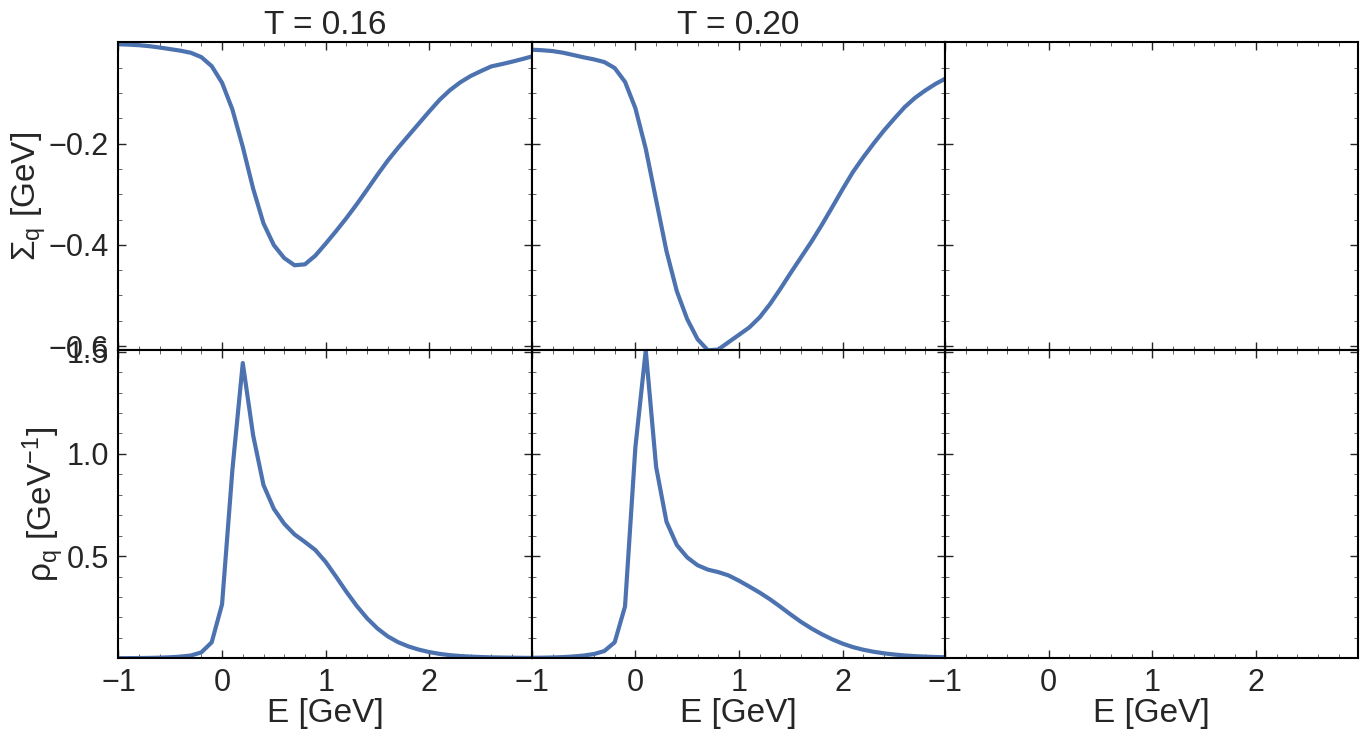

In [173]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(SQs[i][:, 0]))
    ax[1][_i].plot(erange, (pQs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{q}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_q$ [GeV$^{-1}$]')
plt.savefig(folder + 'S_Rho_Q.pdf', bbox_inches='tight')

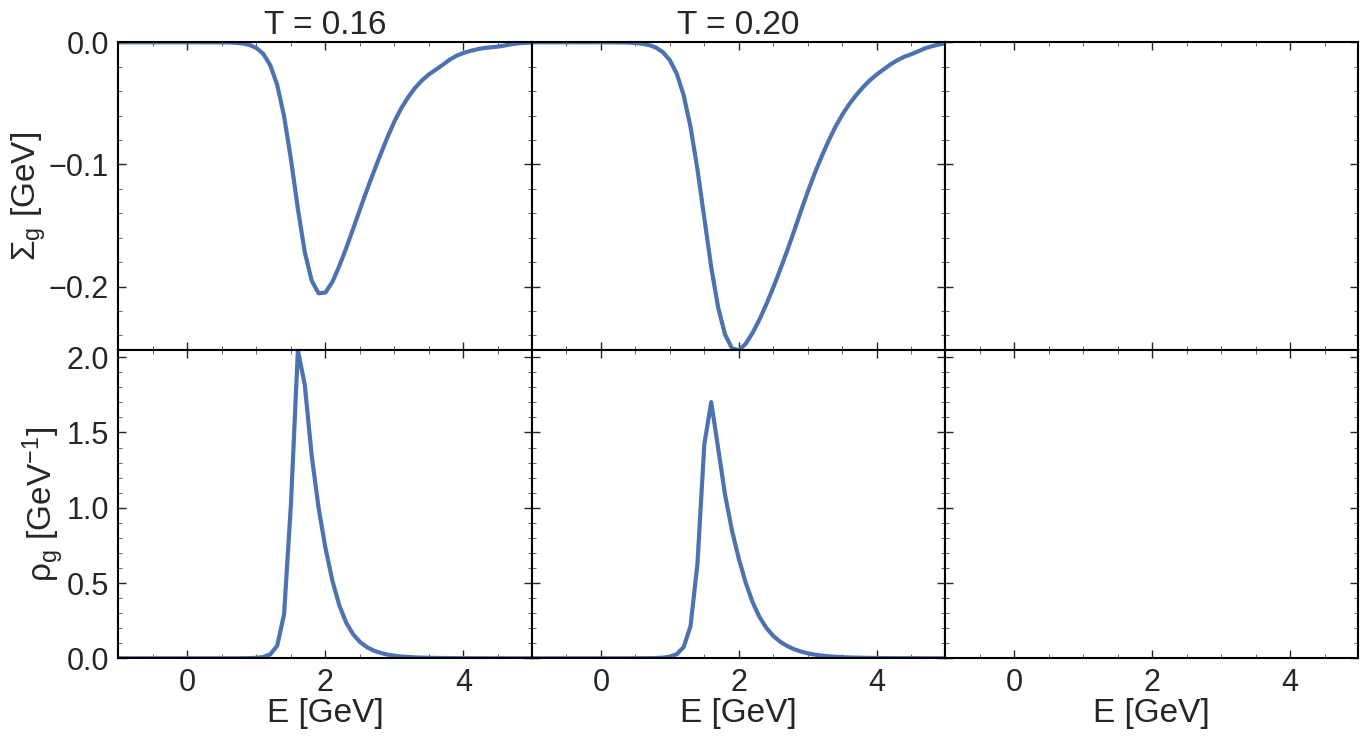

In [174]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(SGs[i][:, 0]))
    ax[1][_i].plot(erange, (pGs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 4.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{g}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_g$ [GeV$^{-1}$]')

plt.savefig(folder + 'S_Rho_G.pdf', bbox_inches='tight')

# Quasiparticle pressure

In [175]:
ps_Q = array([tm.OmQ_F(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pQs)])

In [176]:
ps_G = array([tm.OmQ_B(T, pt.iImG, pt.iReG) 
            for T, pt in zip(trange, pGs)])

In [184]:
from scipy.integrate import quad

Pfree_Q = array([quad(lambda z: z*z*T*log(1 + exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, 5)[0] for T in trange])
Pfree_G = array([quad(lambda z: -z*z*T*log(1 - exp(-sqrt(1.8**2 + z**2)/T)) / 2/pi**2, 0, 5)[0] for T in trange])

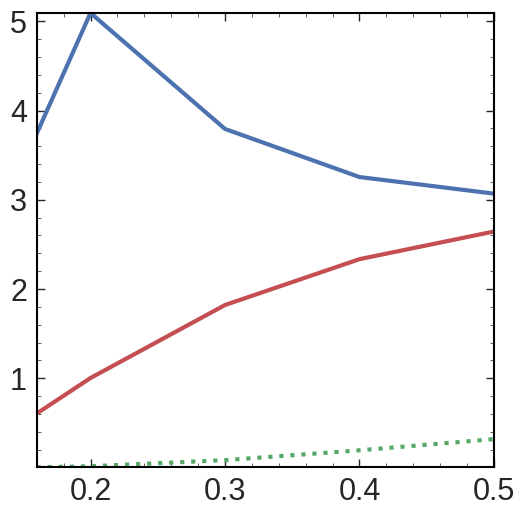

In [185]:
plt.plot(trange, 3*3*2*2*ps_Q/trange**4)
plt.plot(trange, 8*2*ps_G/trange**4, ls=':')

plt.plot(trange, 3*3*2*2*Pfree_Q/trange**4)

# Self-energy pressure 

In [186]:
ps_S_Q = []
ps_S_G = []

# ps_S2 = []

for T, pt, sig_tot in zip(trange, pQs, SQs):
#     sigma = np.sum(list(sms.values()), axis=0) - 1e-3j
    sigma = sig_tot
#     plt.plot(erange, real(sigma[:, 0]))
    iReS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(sigma)))
    iImS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(sigma)))
    
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(pt.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(pt.Gtab)))
    
#     break
#     print(T)
    ps_S_Q += [tm.OmS_F(T, iImG, iReG, iImS, iReS)]

for T, pt, sig_tot in zip(trange, pGs, SGs):
#     sigma = np.sum(list(sms.values()), axis=0) - 1e-3j
    sigma = sig_tot
#     plt.plot(erange, real(sigma[:, 0]))
    iReS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(sigma)))
    iImS = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(sigma)))
    
    iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(pt.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(pt.Gtab)))
    
#     break
#     print(T)
    ps_S_G += [tm.OmS_B(T, iImG, iReG, iImS, iReS)]
#     ps_S2 += [tm.OmS2_F(T, iImG, iReG, iImS, iReS)]
ps_S_Q = array(ps_S_Q)
ps_S_G = array(ps_S_G)

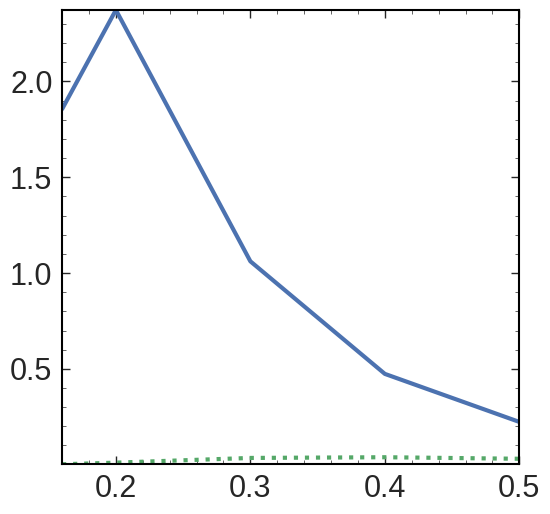

In [187]:
plt.plot(trange, 3*3*2*ps_S_Q/trange**4)
plt.plot(trange, 8*2*ps_S_G/trange**4, ls=':')

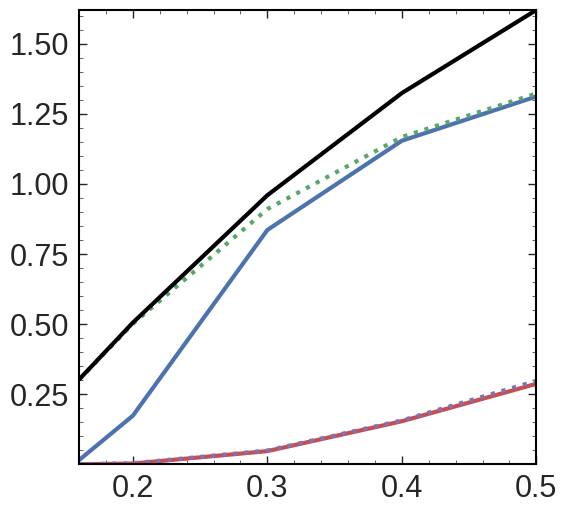

In [188]:
plt.plot(trange, 3*3*2*(ps_Q - ps_S_Q)/trange**4)
plt.plot(trange, 3*3*2*Pfree_Q/trange**4, ls=':')
plt.plot(trange, 8*2*(ps_G - ps_S_G)/trange**4)
plt.plot(trange, 8*2*Pfree_G/trange**4, ls=':')
plt.plot(trange, 8*2*Pfree_G/trange**4 + 3*3*2*Pfree_Q/trange**4, c='black')

# $\Phi$ pressure

In [189]:
NFS = {
    'qa1' : 3, 'qa8' : 3, 'qq3' : 3, 'qq6' : 3, 'qg3' : 1, 'qg6' : 1, 'qg15' : 1,
    'gq3' : 3, 'gq6' : 3, 'gq15' : 3, 'gg1' : 1, 'gg16' : 1, 'gg27' : 1
}

## Quarks

In [190]:
keys_QQ = ['qa1', 'qa8', 'qq3', 'qq6']

keys_QG = ['qg3', 'qg6', 'qg15']

In [191]:
lmax = 1

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

qa1 4.0 1.0 1.0 3
qa8 4.0 8.0 0.125 3
qq3 4.0 3.0 0.5 3
qq6 4.0 6.0 0.25 3


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

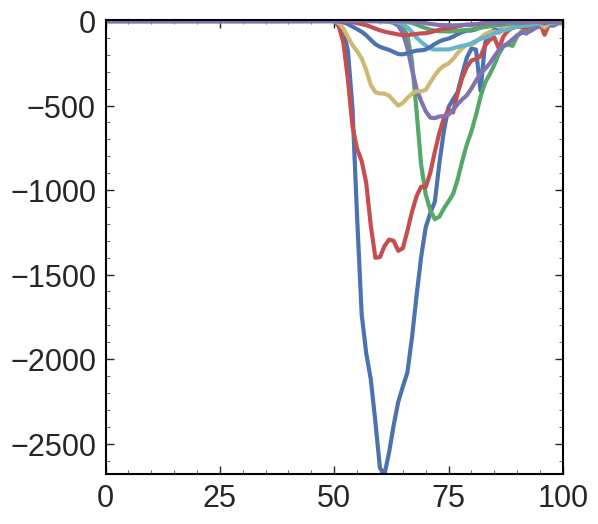

In [195]:
Phis_Q = []

LTs_QQ = dict()
LTs_QG = dict()
Vs = dict()

LSs_QQ = []
LSs_QG = []

for i, T in enumerate(trange[:]):

    xmss_Q = Xs_Q[i]
    LT_QQ = 0
    LT_QG = 0
    
    for k in keys_QQ:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        print(k, ds, da, Fa, NFS[k])

        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_Q[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            LT_QQ += _lt
            lts += [_lt]
        LTs_QQ[k] = lts

    for k in keys_QG:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_Q[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            LT_QG += _lt
            lts += [_lt]
        LTs_QG[k] = lts

    # xms = Xs_Q[i]
    # tms = TMs_Q[i]

    
    # for k, x in xmss_Q[0].items():
    #     # x = xms[k]
    #     # if k == 'qq3':
    #     # print(NFS[k])
    #     ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
    #     v = np.loadtxt(folder + f'{k}_vq_T=%.3f.dat'%T)
    #     Vs[k] = v
    #     print(k, ds, da, Fa, NFS[k])
    #     lt = sign(v[0])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
    #     if k in keys_QQ:
    #         LT_QQ += lt
    #         LTs_QQ[k] = lt
    #     elif k in keys_QG:
    #         LT_QG += lt
    #         LTs_QG[k] = lt
    #     else:
    #         pass

    # break
    ImSTs = []
    ReSTs = []
    for LT, func, p2 in zip([LT_QQ, LT_QG], [tm.sigma_ff_onshell, tm.sigma_fb_onshell], [pQs[i], pGs[i]]):
        iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(LT)))
        #pipe(ch.erange) | p[lambda z: ch.func(z, q, ch.T, ch.iImT, ch.p_j.R)]*(NTHR//1) | END

        plt.plot(imag(LT[:, 0]))
        # break
        iEps1 = tm.Interpolator(qrange, pQs[i].om0(qrange), 'cubic')
        iEps2 = tm.Interpolator(qrange, p2.om0(qrange), 'cubic')
        
        ST = array([
            pipe(erange) | p[lambda z: func(z, q, trange[i], iImLT, p2.R, 
                                           iEps1, iEps2)] * NTHR | END
                    for q in tqdm.tqdm(qrange)])
    
        ST = ST.transpose()
    
        ReST = []
    
        for res in (ST.transpose()):
            iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
            ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
            ReST += [ReSigma]

        ReST = np.array(ReST).transpose()

        ImSTs += [ST]
        ReSTs += [ReST]

    iImST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ImSTs, axis=0)))
    iReST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ReSTs, axis=0)))

    LSs_QQ += [1j*sum(ImSTs, axis=0) + sum(ReSTs, axis=0)]
    
    pt = pQs[i]

    # break
    Phi = 0.5 * tm.OmS_F(trange[i], pt.iImG, pt.iReG, iImST, iReST)
    Phis_Q += [Phi]

In [196]:
iEps1(0.5), iEps2(0.5)

(0.7810249675906654, 1.8681541692269406)

In [197]:
p2.R(0.5, 0.5)

0.00013109497468141512

In [198]:
iImLT(0.5, 0.5)

-0.00015501017525662868

In [199]:
ImSTs[1]

array([[-1.49169750e-07, -1.35211462e-07, -9.22167733e-08, ...,
        -2.13738853e-13, -5.22579969e-14, -3.53426904e-15],
       [-1.37488554e-07, -1.39550449e-07, -9.22547849e-08, ...,
         3.76282665e-15, -9.82597221e-15, -5.93087610e-16],
       [-1.63627009e-07, -1.37834857e-07, -9.31494170e-08, ...,
        -2.14306245e-14, -5.65436488e-15, -7.92152212e-16],
       ...,
       [-1.37596981e-07, -1.36494532e-07, -1.32634723e-07, ...,
        -1.62588709e-05, -2.49845472e-05, -3.06267110e-05],
       [-7.58293041e-08, -7.85681974e-08, -8.19809339e-08, ...,
        -1.21916313e-05, -1.89784482e-05, -2.72180752e-05],
       [-3.93669036e-08, -4.21650403e-08, -4.90371971e-08, ...,
        -9.01861309e-06, -1.41327196e-05, -2.21340271e-05]])

In [161]:
imag(LT_QG[:, 0])

array([-9.55622640e-11, -1.67902373e-10, -2.88986359e-10, -4.50936966e-10,
       -6.48603401e-10, -9.12146929e-10, -1.25740338e-09, -1.74992110e-09,
       -2.48770201e-09, -3.61198447e-09, -5.32302501e-09, -7.89986555e-09,
       -1.18329888e-08, -1.81488651e-08, -2.91214926e-08, -4.94147503e-08,
       -7.97356131e-08, -1.08887762e-07, -1.34131521e-07, -1.57320746e-07,
       -1.80349920e-07, -2.05120211e-07, -2.31354898e-07, -2.55667015e-07,
       -2.76281041e-07, -2.98557499e-07, -3.29071021e-07, -3.70448366e-07,
       -4.23624446e-07, -4.88550357e-07, -5.66275922e-07, -6.57095277e-07,
       -7.50930927e-07, -8.31082040e-07, -8.98076853e-07, -9.63581521e-07,
       -1.04716399e-06, -1.16574387e-06, -1.31063497e-06, -1.47167971e-06,
       -1.65815005e-06, -1.88740375e-06, -2.16578870e-06, -2.48263665e-06,
       -2.84300456e-06, -3.30137531e-06, -3.96234927e-06, -4.99052213e-06,
       -6.67278555e-06, -9.65587828e-06, -1.54956256e-05, -2.78373284e-05,
       -5.73259037e-05, -

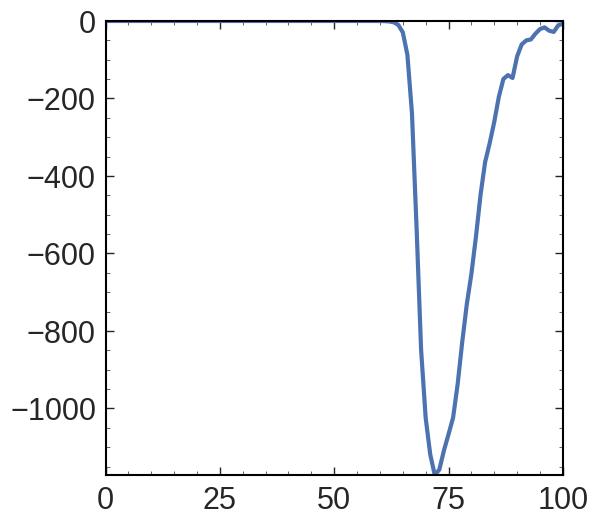

In [160]:
plt.plot(imag(LT_QG[:, 0]))

In [158]:
ImSTs[0]

array([[-6.17118667e-05, -8.05905179e-05, -1.40232845e-04, ...,
        -1.06423406e-07, -3.40008539e-08, -3.84179016e-09],
       [-6.41865294e-05, -9.97972293e-05, -1.34635571e-04, ...,
        -6.57608657e-08, -1.49302390e-08,  2.53235004e-10],
       [-7.86249225e-05, -1.18838539e-04, -1.48426095e-04, ...,
        -5.30859787e-08, -4.71185824e-09,  3.42948256e-10],
       ...,
       [-7.61593155e-05, -6.86783873e-05, -5.85984012e-05, ...,
        -4.71797721e-04, -4.64995864e-04, -1.55158480e-04],
       [-4.45777222e-05, -4.05407047e-05, -3.30466228e-05, ...,
        -3.30572706e-04, -5.11712995e-04, -2.41541385e-04],
       [-2.48447293e-05, -2.34874360e-05, -1.99328511e-05, ...,
        -2.36335487e-04, -4.46472795e-04, -3.45192973e-04]])

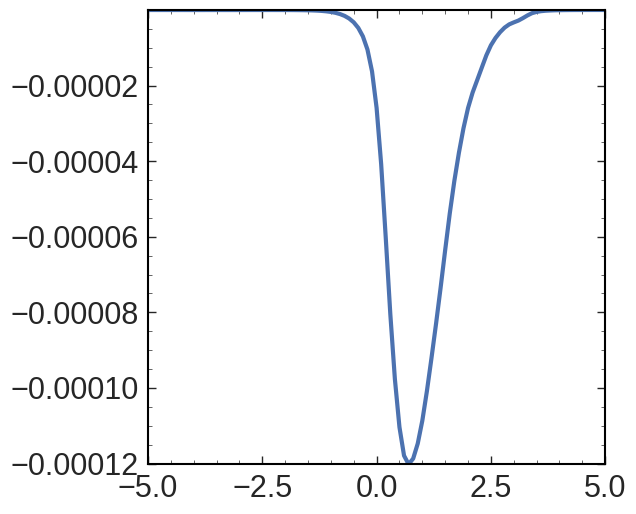

In [159]:
plt.plot(erange, ImSTs[1][:, 0])

In [133]:
LSs_QQ[0]

array([[ 0.00000000e+00-6.17171657e-05j,  0.00000000e+00-8.05978879e-05j,
         0.00000000e+00-1.40240486e-04j, ...,
         0.00000000e+00-1.06423407e-07j,  0.00000000e+00-3.40008546e-08j,
         0.00000000e+00-3.84179017e-09j],
       [-1.87991337e-02-6.41928393e-05j, -1.56428363e-02-9.98050263e-05j,
        -1.00011056e-02-1.34643548e-04j, ...,
        -1.17177988e-05-6.57608643e-08j, -7.08411303e-06-1.49302391e-08j,
        -2.65207764e-06+2.53235018e-10j],
       [-1.91282552e-02-7.86325710e-05j, -1.58899691e-02-1.18847682e-04j,
        -1.01619504e-02-1.48433813e-04j, ...,
        -1.18198416e-05-5.30859787e-08j, -7.16049334e-06-4.71185826e-09j,
        -2.68095410e-06+3.42948252e-10j],
       ...,
       [ 3.21669367e-02-7.61601582e-05j,  2.74462428e-02-6.86791512e-05j,
         1.85801996e-02-5.85990215e-05j, ...,
         3.11642185e-04-4.71803901e-04j, -5.83489034e-05-4.65005566e-04j,
        -8.12091844e-05-1.55173599e-04j],
       [ 3.11614722e-02-4.45780026e-05j,  2.

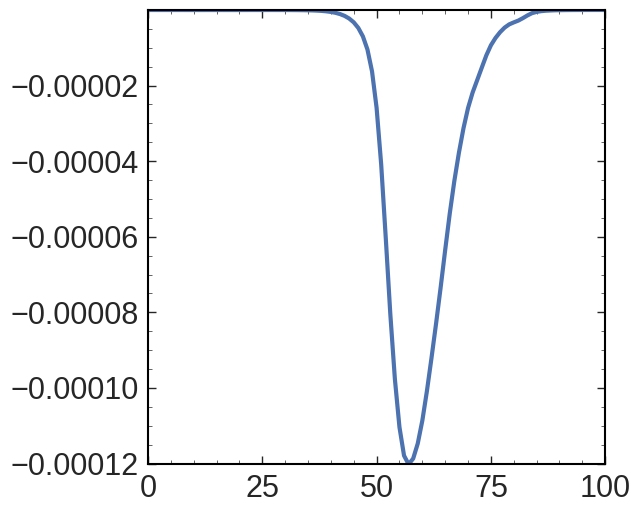

In [112]:
plt.plot(imag(LSs_QQ[0][:, 0]))

In [200]:
Phis_Q

[1.5474861520417954e-05,
 5.031336003201712e-05,
 0.00011705572341678138,
 0.00016678919509359116,
 0.0001924601494743188]

In [87]:
len(LSs_QQ)

5

In [88]:
LTs_QQ

{'qa1': [array([[-4.15025363e+02+1.11415413e-06j, -1.71039504e+02+4.59163190e-07j,
          -3.23507047e+01+8.68469124e-08j, ...,
          -3.55115544e-04+9.53323547e-13j, -2.57563675e-04+6.91441196e-13j,
          -1.89855983e-04+5.09676870e-13j],
         [-4.18180991e+02+2.50778836e-06j, -1.72339995e+02+1.03350521e-06j,
          -3.25966819e+01+1.95478946e-07j, ...,
          -3.57815650e-04+2.14578363e-12j, -2.59522050e-04+1.55632702e-12j,
          -1.91299545e-04+1.14720368e-12j],
         [-4.18229729e+02+5.14098583e-06j, -1.72360081e+02+2.11869380e-06j,
          -3.26004810e+01+4.00733376e-07j, ...,
          -3.57857353e-04+4.39887329e-12j, -2.59552297e-04+3.19048262e-12j,
          -1.91321841e-04+2.35177656e-12j],
         ...,
         [-4.06490820e+02-5.69505933e-01j, -1.67522263e+02-2.34703758e-01j,
          -3.16854478e+01-4.43922708e-02j, ...,
          -3.47812981e-04-4.87296507e-07j, -2.52267160e-04-3.53433921e-07j,
          -1.85951802e-04-2.60524099e-07j],
   

In [89]:
keys_GG = ['gg1', 'gg16', 'gg27']
keys_GQ = ['gq3', 'gq6', 'gq15']

In [204]:
Phis_G = []

LTs_GG = dict()
LTs_GQ = dict()
Vs = dict()

LSs_GG = []
LSs_GQ = []

for i, T in enumerate(trange[:]):
    LT_GG = 0
    LT_GQ = 0
    xmss_G = Xs_G[i]

    for k in keys_GG:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            # print(l)
            xms = xmss_G[l]
            x = xms[k]
            # plt.plot(erange, x[:, 0])
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 16 * v**2 / x * log(1 - x)
            LT_GG += _lt
            lts += [_lt]
        LTs_GG[k] = lts
    #     break
    # break
    for k in keys_GQ:
        ds, da, Fa = np.loadtxt(folder + f'{k}_weights')
        _lt = 0
        lts = []
        for l in range(lmax + 1):
            xms = xmss_G[l]
            x = xms[k]
            v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
            Vs[k] = v
            # print(k, ds, da, Fa, NFS[k])
            _lt = (2*l + 1) * sign(v[1])*4*pi*NFS[k]*ds * da / 16 * v**2 / x * log(1 - x)
            LT_GQ += _lt
            lts += [_lt]
        LTs_GQ[k] = lts

    # break
    # xms = Xs_G[i]
    # tms = TMs_G[i]
    
    # for k, x in xms.items():
    #     # x = xms[k]
    #     # if k == 'qq3':
    #     # print(NFS[k])
    #     ds, da, Fa = np.loadtxt(folder + f'{k}_weights')

    #     #### adding the p-wave

    #     lt = 0

    #     for l in range(lmax + 1):
    #         v = np.loadtxt(folder + f'{k}_vq_l=%i_T=%.3f.dat'%(l, T))
    #         Vs[k] = v
    #         print(k, ds, da, Fa)
    #         lt += sign(v[0])*4*pi*NFS[k]*ds * da / 6 * v**2 / x * log(1 - x)
            
    #     if k in keys_GG:
    #         LT_GG += lt
    #         LTs_GG[k] = lt 
    #     elif k in keys_GQ:
    #         LT_GQ += lt
    #         LTs_GQ[k] = lt 
    #     else:
    #         pass

    # break
    ImSTs = []
    ReSTs = []
    for LT, func, p2 in zip([LT_GG, LT_GQ], [tm.sigma_bb_onshell, tm.sigma_bf_onshell], [pGs[i], pQs[i]]):
        iImLT = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(LT)))
        #pipe(ch.erange) | p[lambda z: ch.func(z, q, ch.T, ch.iImT, ch.p_j.R)]*(NTHR//1) | END

        iEps1 = tm.Interpolator(qrange, pGs[i].om0(qrange), 'cubic')
        iEps2 = tm.Interpolator(qrange, p2.om0(qrange), 'cubic')
        
        ST = array([
            pipe(erange) | p[lambda z: func(z, q, trange[i], iImLT, p2.R, iEps1, iEps2)] * NTHR | END
                    for q in tqdm.tqdm(qrange)])
    
        ST = ST.transpose()
    
        ReST = []
    
        for res in (ST.transpose()):
            iImSigma = tm.Interpolator(erange, np.ascontiguousarray(res), 'cubic')
            ReSigma = [tm.ReSigmaKK(e, iImSigma) for e in erange]
            ReST += [ReSigma]

        ReST = np.array(ReST).transpose()

        ImSTs += [ST]
        ReSTs += [ReST]

    iImST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ImSTs, axis=0)))
    iReST = tm.Interpolator2D(qrange, erange, ascontiguousarray(sum(ReSTs, axis=0)))

    LSs_GG += [1j*sum(ImSTs, axis=0) + sum(ReSTs, axis=0)]
    
    pt = pGs[i]

    break
    
    Phi = 0.5 * tm.OmS_B(trange[i], pt.iImG, pt.iReG, iImST, iReST)
    Phis_G += [Phi]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

In [91]:
matplotlib.style.use('publication')

In [209]:
imag(LT_GG)

array([[ 6.37373426e-17,  1.04962060e-17,  1.07082436e-18, ...,
         2.99004152e-23,  2.19328805e-23,  1.63264223e-23],
       [ 9.83098758e-17,  1.60308125e-17,  1.63429385e-18, ...,
         4.56222282e-23,  3.34653059e-23,  2.49109348e-23],
       [ 1.48454455e-16,  2.42417362e-17,  2.47162768e-18, ...,
         6.89994430e-23,  5.06132136e-23,  3.76755115e-23],
       ...,
       [-4.70353536e+01, -9.94751242e+00, -1.03109732e+00, ...,
        -2.89552296e-05, -2.12397156e-05, -1.58105438e-05],
       [-4.14454552e+01, -8.81896714e+00, -9.14427738e-01, ...,
        -2.56819848e-05, -1.88386742e-05, -1.40232444e-05],
       [-3.56988106e+01, -7.59809517e+00, -7.87848051e-01, ...,
        -2.21270646e-05, -1.62310105e-05, -1.20821363e-05]])

In [207]:
Phis_G

[]

In [93]:
Phis_Q

[1.547493627114295e-05,
 5.0315350342877615e-05,
 0.0001171239327565673,
 0.00016714036109382764,
 0.00019330890645779115]

In [94]:
Phis_Q

[1.547493627114295e-05,
 5.0315350342877615e-05,
 0.0001171239327565673,
 0.00016714036109382764,
 0.00019330890645779115]

In [95]:
Phis_Q

[1.547493627114295e-05,
 5.0315350342877615e-05,
 0.0001171239327565673,
 0.00016714036109382764,
 0.00019330890645779115]

In [96]:
i = 0

In [97]:
Phis_Q = array(Phis_Q)

In [98]:
Phis_G = array(Phis_G)

In [99]:
Phis_Q

array([1.54749363e-05, 5.03153503e-05, 1.17123933e-04, 1.67140361e-04,
       1.93308906e-04])

In [100]:
import matplotlib
matplotlib.style.use('publication')

In [101]:
import pandas as pd

In [102]:
lat = pd.read_csv('/home/const/MEGA/Physics/GrabbedFigures/LiuRapp2018/PT.csv')

Get the contributions to pressure

In [103]:
Nc = 3
Nf = 3
Ns = 2
Na = 2

In [104]:
P_QP_G = (Nc**2 - 1) * Ns * (ps_G - ps_S_G)
P_QP_Q = Nc * Nf * Ns * Na * (ps_Q - ps_S_Q)

P_Q_G = (Nc**2 - 1) * Ns * (ps_G)
P_Q_Q = Nc * Nf * Ns * Na * (ps_Q)

P_S_G = (Nc**2 - 1) * Ns * (- ps_S_G)
P_S_Q = Nc * Nf * Ns * Na * (- ps_S_Q)

P_Phi_Q = Nc * Nf * Ns * Na * Phis_Q 
P_Phi_G = (Nc**2 - 1) * Ns * Phis_G 

P_Phi = P_Phi_G + P_Phi_Q

P_tot = P_QP_G + P_QP_Q + P_Phi

Text(47.02777777777777, 0.5, 'P/T$^4$')

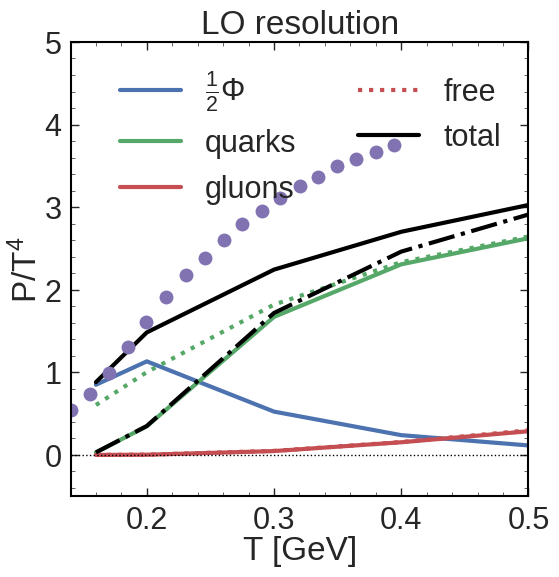

In [105]:
lp, = plt.plot(trange, P_Phi/trange**4, label=r'$\frac{1}{ 2 }\Phi$')
# plt.plot(trange, P_phi_tot_1, label=r'$\frac{1}{ 2 }\Phi$ L=1', c=lp.get_c(), ls='--')

# plt.plot(trange, 8*2*Phis_G/trange**4 / 2)
lQ, = plt.plot(trange, P_QP_Q/trange**4, label='quarks')
plt.plot(trange, 3*3*2*2*Pfree_Q/trange**4, ls=':', c=lQ.get_c())
lG, = plt.plot(trange, P_QP_G/trange**4, label='gluons')
plt.plot(trange, 8*2*Pfree_G/trange**4, ls=':', c=lG.get_c(), label='free')

plt.plot(trange, (P_QP_Q + P_QP_G)/trange**4, ls='-.', c='black')
plt.plot(trange, P_tot/trange**4, c='black', label='total')
# plt.plot(trange, )

plt.title(mode + ' resolution')
plt.ylim(-0.5, 5)
plt.legend(ncol=2)

plt.plot(lat.x, lat.PT_lat, ls='none', marker='o')

plt.axhline(0, lw=1, ls=':', c='black')

plt.savefig(folder + 'PT_swave_'+mode+'.pdf', bbox_inches='tight')

plt.xlabel('T [GeV]')
plt.ylabel(r'P/T$^4$')

In [106]:
df_P = pd.DataFrame(array([trange, P_tot, P_Q_Q, P_Q_G, P_S_Q, P_S_G, P_Phi, P_Phi_Q, P_Phi_G]).transpose(), 
               columns=['T', 'Ptot', 'P_Q_Q', 'P_Q_G', 'P_S_Q', 'P_S_G', 'P_Phi', 'P_Phi_Q', 'P_Phi_G'])

In [107]:
df_P

,T,Ptot,P_Q_Q,P_Q_G,P_S_Q,P_S_G,P_Phi,P_Phi_Q,P_Phi_G
0,0.16,0.000578,0.002453,0.000001,-0.002432,-0.000001,0.000557,0.000557,1.321227e-07
1,0.20,0.002374,0.008151,0.000021,-0.007594,-0.000016,0.001813,0.001811,1.966211e-06
2,0.30,0.018178,0.030734,0.000665,-0.017192,-0.000281,0.004252,0.004216,3.562741e-05
3,0.40,0.069173,0.083334,0.004924,-0.024245,-0.000985,0.006146,0.006017,1.285389e-04
4,0.50,0.189158,0.191828,0.019862,-0.027843,-0.001902,0.007214,0.006959,2.544507e-04


In [108]:
df_P.to_csv(folder + 'pressure.csv')

## Plotting the integrands

LogSigma plots

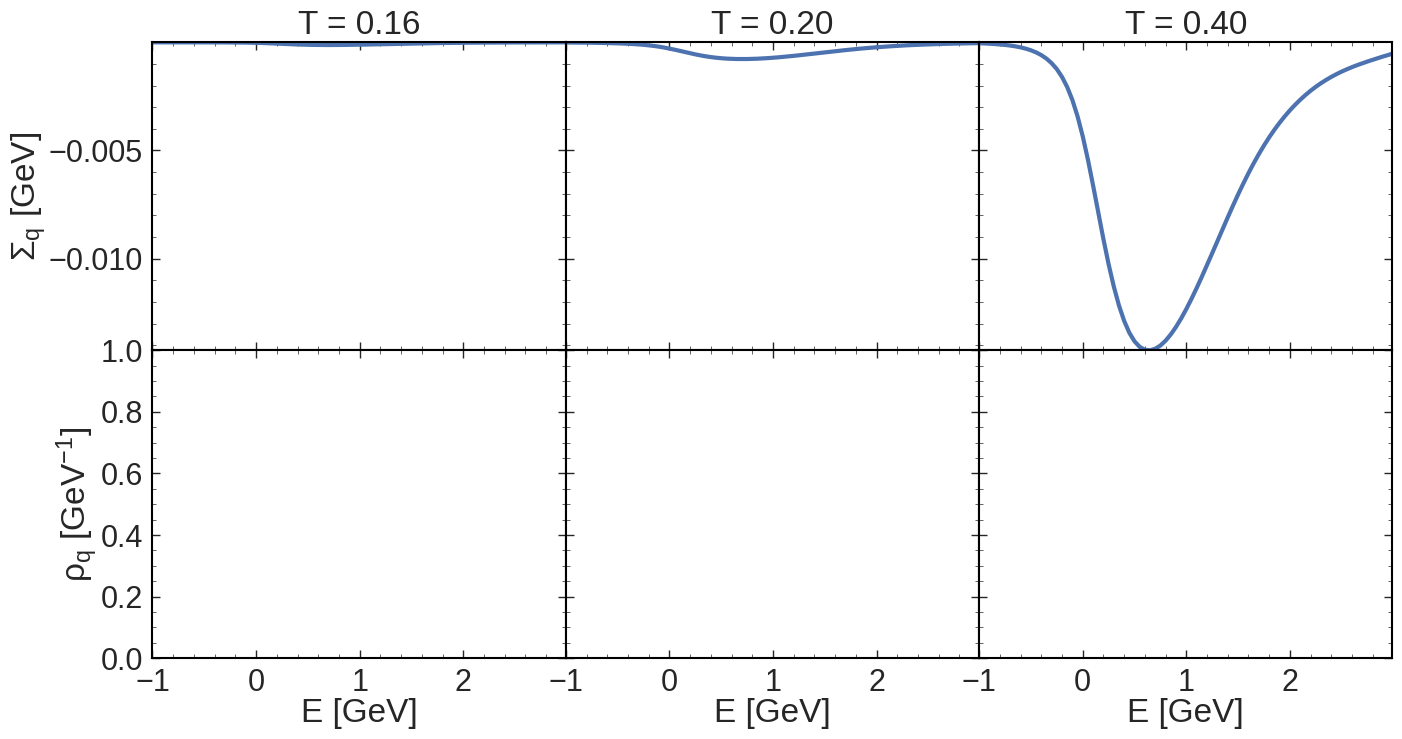

In [123]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey='row', sharex='all')

for i, _i in zip(irange, range(5)):
    ax[0][_i].plot(erange, imag(LSs_QQ[i][:, 0]))
    # ax[1][_i].plot(erange, (pQs[i].Rtab[:, 0]))
    ax[0][_i].set_title('T = %.2f'%trange[i])
# for i in irange:

for _ in ax.flatten():
    _.set_xlim(-1, 2.99)

for _ in ax[1]:
    _.set_xlabel(r'E [GeV]')

plt.subplots_adjust(hspace=0, wspace=0)
ax[0][0].set_ylabel(r'$\Sigma_{q}$ [GeV]')
ax[1][0].set_ylabel(r'$\rho_q$ [GeV$^{-1}$]')
plt.savefig(folder + 'LogS_Rho_Q.pdf', bbox_inches='tight')